In [6]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Baca data dari file CSV
df = pd.read_csv('data_kuesioner.csv', sep=';')

print(tabulate(df.head(5), headers='keys', tablefmt='grid'))

+----+-------------+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
|    | Responden   | Aplikasi    |   KP1 |   KP2 |   KP3 |   KP4 |   KP5 |   KP6 |   KP7 |   KP8 |   KP9 |   KP10 |
+====+=============+=============+=======+=======+=======+=======+=======+=======+=======+=======+=======+========+
|  0 | R1          | Spotify     |     3 |     3 |     3 |     3 |     3 |     2 |     3 |     4 |     3 |      3 |
+----+-------------+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
|  1 | R2          | Spotify     |     2 |     4 |     4 |     4 |     4 |     4 |     4 |     3 |     3 |      4 |
+----+-------------+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
|  2 | R3          | Apple Music |     3 |     4 |     4 |     3 |     3 |     3 |     4 |     4 |     2 |      3 |
+----+-------------+-------------+-------+-------+-------+-------+------

In [8]:
kp_columns = [f'KP{i}' for i in range(1, 11)]

In [9]:
df['Rata_rata'] = df[kp_columns].astype(int).mean(axis=1)

In [10]:
df['Kepuasan'] = df['Rata_rata'].apply(lambda x: 'Puas' if x >= 3.5 else 'Tidak Puas')

In [11]:
print("Data dengan Kategori Kepuasan:")
print(df[['Responden', 'Aplikasi', 'Rata_rata', 'Kepuasan']])

Data dengan Kategori Kepuasan:
    Responden     Aplikasi  Rata_rata    Kepuasan
0          R1      Spotify        3.0  Tidak Puas
1          R2      Spotify        3.6        Puas
2          R3  Apple Music        3.3  Tidak Puas
3          R4      Spotify        3.6        Puas
4          R5      Spotify        4.0        Puas
..        ...          ...        ...         ...
235      R236  Apple Music        2.6  Tidak Puas
236      R237      Spotify        4.0        Puas
237      R238      Spotify        3.9        Puas
238      R239      Spotify        3.6        Puas
239      R240  Apple Music        3.5        Puas

[240 rows x 4 columns]


In [12]:
kepuasan_counts = df.groupby(['Aplikasi', 'Kepuasan']).size().unstack(fill_value=0)

print("\nJumlah Kepuasan untuk Setiap Aplikasi:")
print(kepuasan_counts)


Jumlah Kepuasan untuk Setiap Aplikasi:
Kepuasan     Puas  Tidak Puas
Aplikasi                     
Apple Music    40          39
Spotify       113          48


In [13]:
kepuasan_percent = kepuasan_counts.div(kepuasan_counts.sum(axis=1), axis=0) * 100

print("\nPersentase Kepuasan untuk Setiap Aplikasi (%):")
print(kepuasan_percent.round(2))


Persentase Kepuasan untuk Setiap Aplikasi (%):
Kepuasan      Puas  Tidak Puas
Aplikasi                      
Apple Music  50.63       49.37
Spotify      70.19       29.81


In [14]:
# Simpan DataFrame ke file CSV
df[['Responden', 'Aplikasi', 'Rata_rata', 'Kepuasan']].to_csv('data_kepuasan.csv', index=False)

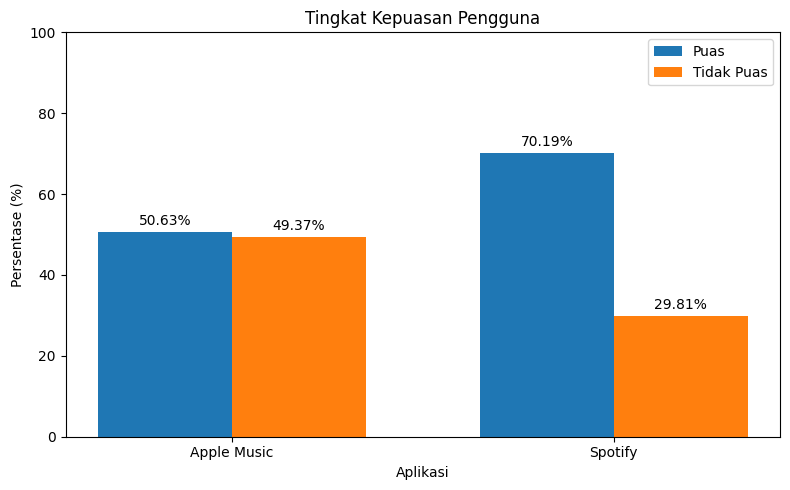

In [15]:
# Data
data = {
    "Aplikasi": ["Apple Music", "Spotify"],
    "Puas": [50.63, 70.19],
    "Tidak Puas": [49.37, 29.81]
}

# Konversi data ke DataFrame
df = pd.DataFrame(data)

# Membuat plot batang
fig, ax = plt.subplots(figsize=(8, 5))

# Menentukan posisi batang
bar_width = 0.35
index = range(len(df))

# Membuat batang untuk "Puas" dan "Tidak Puas"
bar1 = ax.bar(index, df["Puas"], bar_width, label="Puas")
bar2 = ax.bar([i + bar_width for i in index], df["Tidak Puas"], bar_width, label="Tidak Puas")

# Menambahkan label jumlah dan persentase
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f'{df["Puas"][i]:.2f}%',
            ha='center', va='bottom', fontsize=10)

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f'{df["Tidak Puas"][i]:.2f}%',
            ha='center', va='bottom', fontsize=10)

# Menambahkan label sumbu X dan Y
ax.set_xlabel('Aplikasi')
ax.set_ylabel('Persentase (%)')
ax.set_title('Tingkat Kepuasan Pengguna')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df["Aplikasi"])

# Menetapkan batasan Y agar lebih jelas
plt.ylim(0, 100)

# Menampilkan legend
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()